In [60]:
import pandas as pd
df = pd.read_csv('employee.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [63]:
df.dropna(inplace=True)
df.fillna(value=0, inplace=True)


In [64]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [65]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

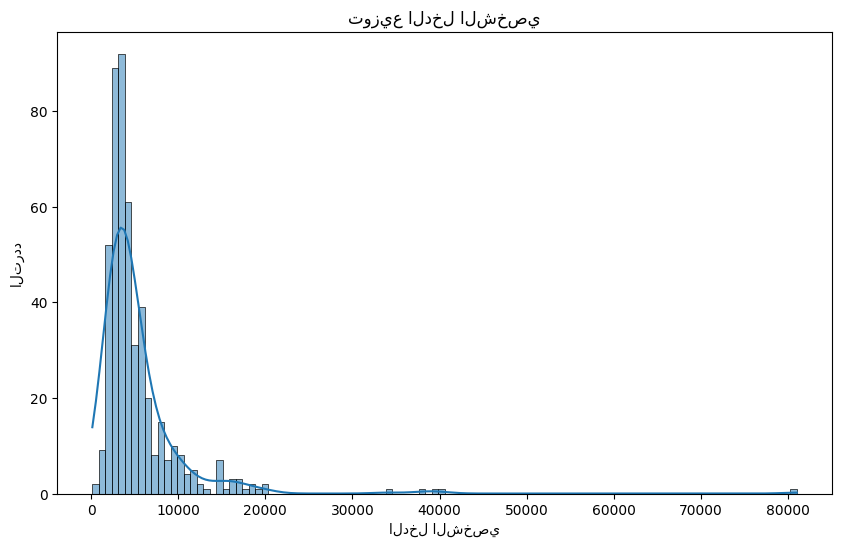

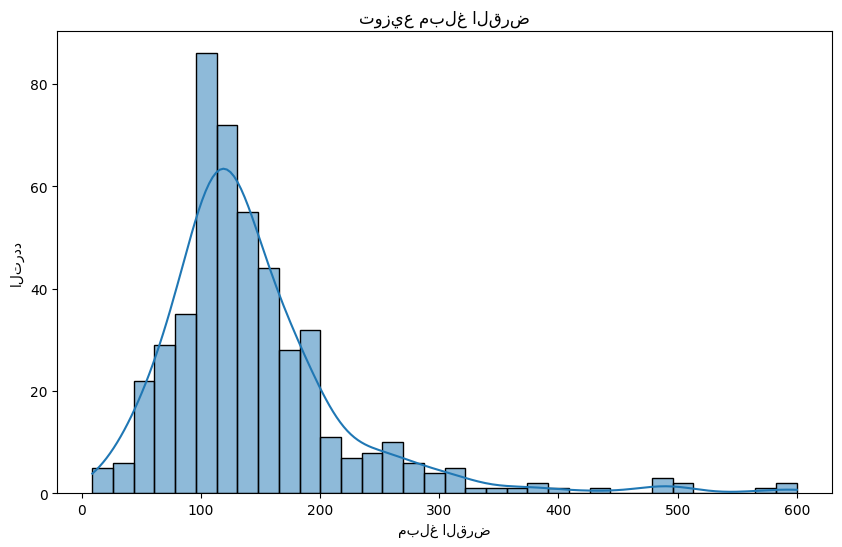

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('توزيع الدخل الشخصي')
plt.xlabel('الدخل الشخصي')
plt.ylabel('التردد')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('توزيع مبلغ القرض')
plt.xlabel('مبلغ القرض')
plt.ylabel('التردد')
plt.show()


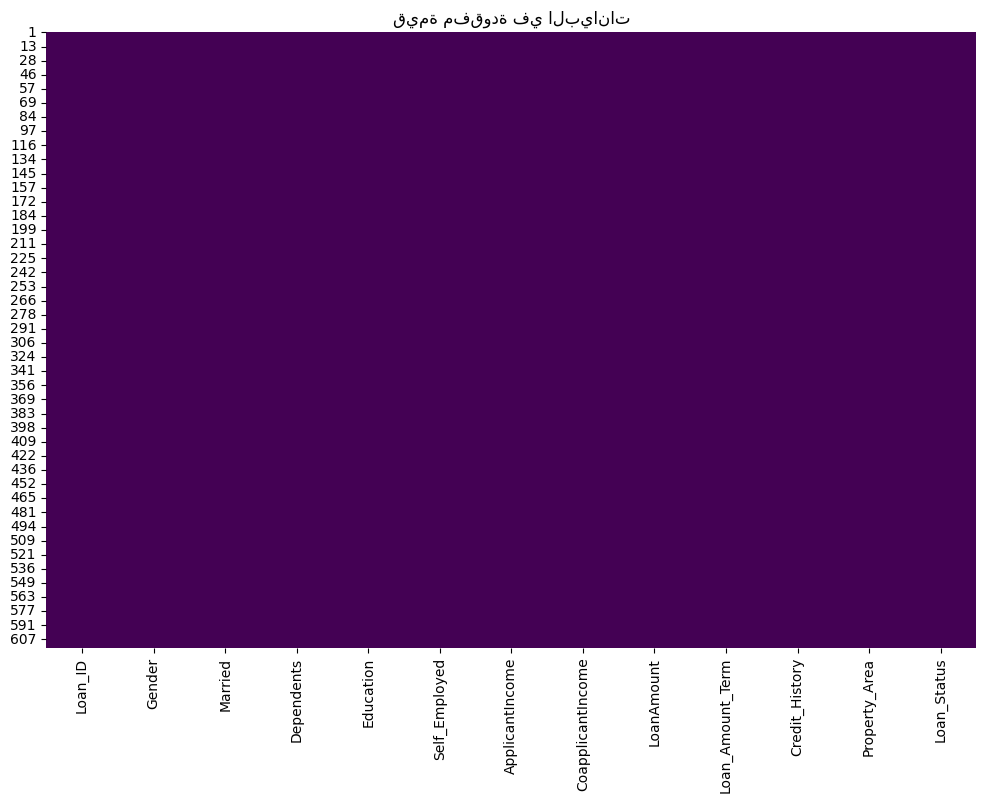

In [67]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('قيمة مفقودة في البيانات')
plt.show()


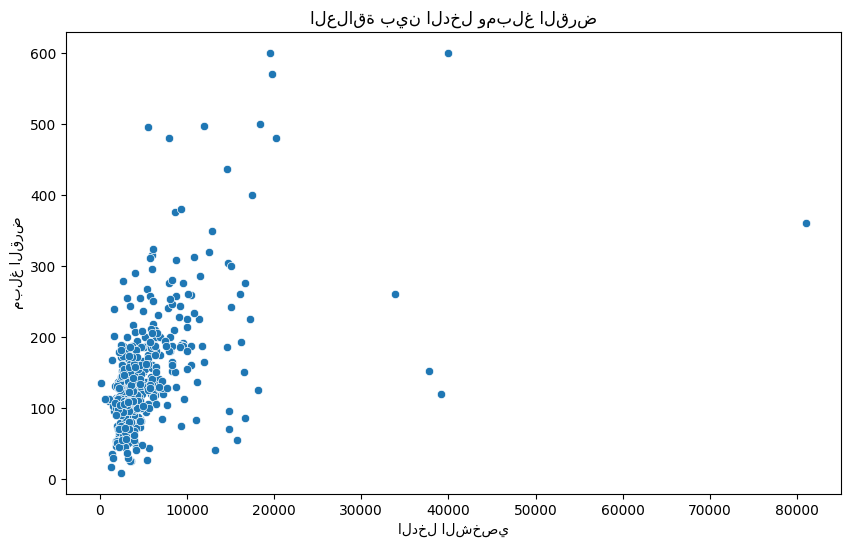

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('العلاقة بين الدخل ومبلغ القرض')
plt.xlabel('الدخل الشخصي')
plt.ylabel('مبلغ القرض')
plt.show()


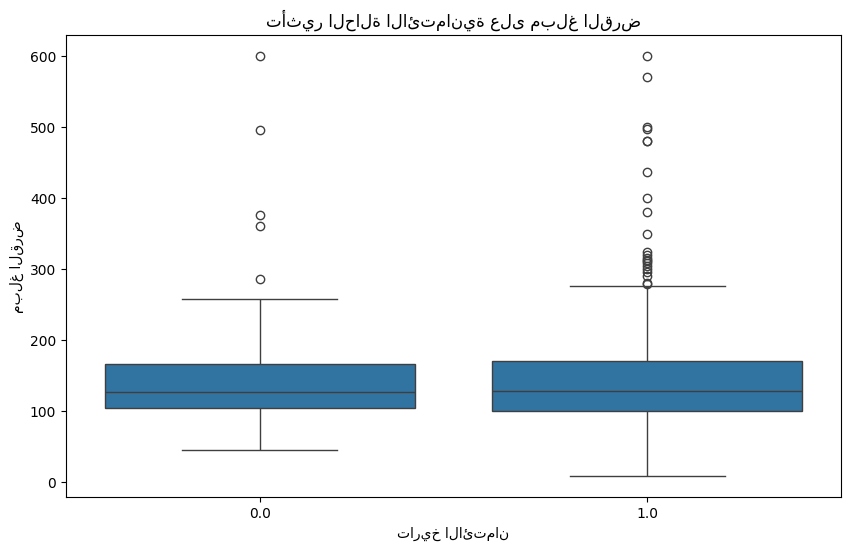

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_History', y='LoanAmount', data=df)
plt.title('تأثير الحالة الائتمانية على مبلغ القرض')
plt.xlabel('تاريخ الائتمان')
plt.ylabel('مبلغ القرض')
plt.show()


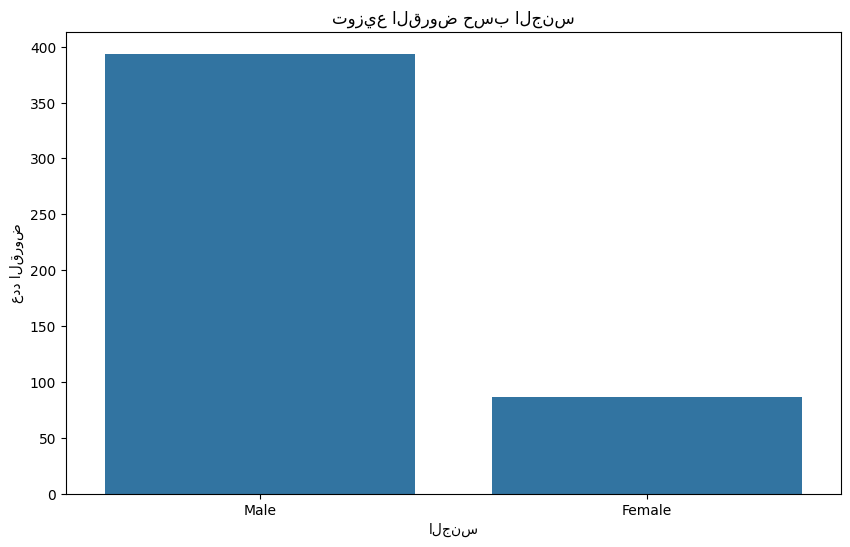

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('توزيع القروض حسب الجنس')
plt.xlabel('الجنس')
plt.ylabel('عدد القروض')
plt.show()


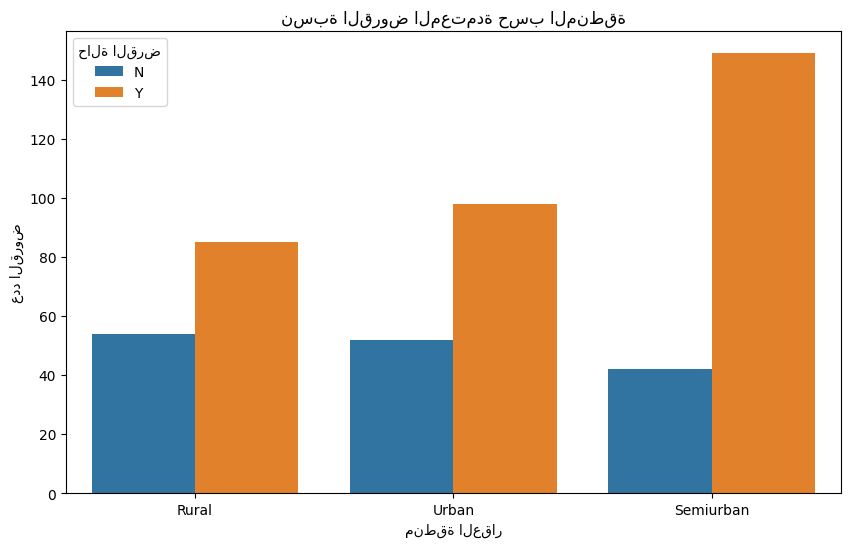

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('نسبة القروض المعتمدة حسب المنطقة')
plt.xlabel('منطقة العقار')
plt.ylabel('عدد القروض')
plt.legend(title='حالة القرض')
plt.show()


In [89]:
import numpy as np
df['Loan_Status'] = df['Loan_Status'].replace({'N':0,'Y':1}).astype(np.uint8)
df['Property_Area'] = df['Property_Area'].replace({'Urban':0,'Rural':1,'Semiurban':-1}).astype(np.uint8)
df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0}).astype(np.uint8)
df['Married'] = df['Married'].replace({'Yes':1,'No':0}).astype(np.uint8)
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1,'No':0}).astype(np.uint8)
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Dependents'] = df['Dependents'].replace({'1':1,'2':2,'0':0,'3+':-1}).astype(np.uint8)

In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [91]:
df1.head(30)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1
6,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,0,1
8,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,0,1
9,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,255,0
10,0,1,2,1,0,3200,700.0,70.0,360.0,1.0,0,1
12,0,1,2,1,0,3073,8106.0,200.0,360.0,1.0,0,1


In [92]:
df.shape

(480, 13)

In [93]:
df1 = df.drop(columns=['Loan_ID'])

In [95]:
df1.shape

(480, 12)

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
print(df.columns)
X = df1.drop(columns=['Loan_Status'])
y = df1['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of x_train: ", X_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Shape of x_train:  (384, 11)
Shape of x_test:  (96, 11)
Shape of y_train:  (384,)
Shape of y_test:  (96,)


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [98]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=33)

In [100]:
predictions = DecisionTreeClassifierModel.predict(X_test)

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.43      0.52        28
           1       0.79      0.91      0.85        68

    accuracy                           0.77        96
   macro avg       0.73      0.67      0.69        96
weighted avg       0.76      0.77      0.75        96



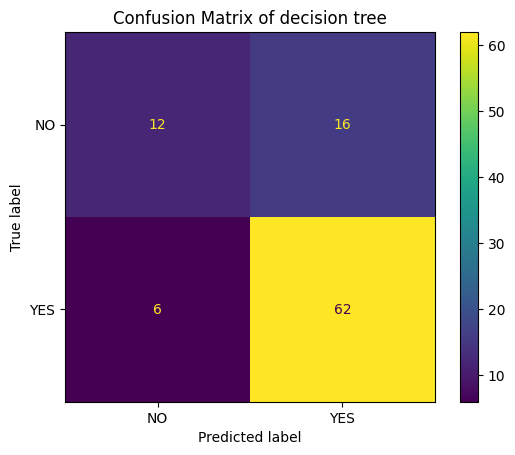

In [102]:
tree_matrix = confusion_matrix(y_test,predictions)
tree_display = ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['NO','YES'])
tree_display.plot()
plt.title("Confusion Matrix of decision tree")
plt.show()

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
random_model = RandomForestClassifier(n_estimators=500)

In [115]:
random_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [117]:
predictions=random_model.predict(X_test)

In [119]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.46      0.60        28
           1       0.81      0.97      0.89        68

    accuracy                           0.82        96
   macro avg       0.84      0.72      0.75        96
weighted avg       0.83      0.82      0.80        96



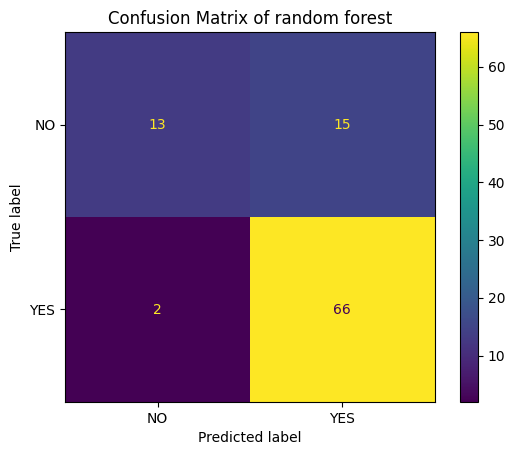

In [120]:
random_matrix = confusion_matrix(y_test,predictions)
random_display = ConfusionMatrixDisplay(confusion_matrix = random_matrix, display_labels = ['NO','YES'])
random_display.plot()
plt.title("Confusion Matrix of random forest")
plt.show()

In [121]:
from sklearn.svm import SVC

In [122]:
model = SVC()

In [123]:
model.fit(X_train,y_train)

SVC()

In [124]:
predictions = model.predict(X_test)

In [125]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


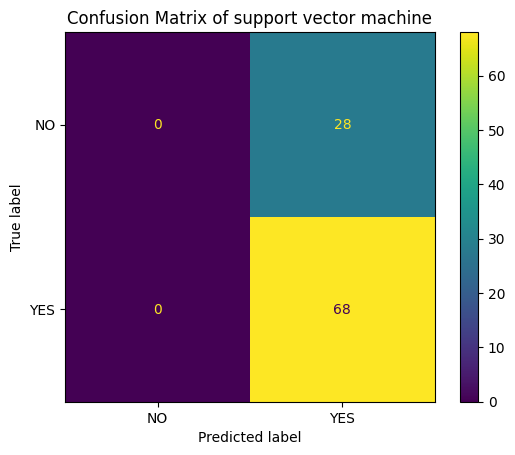

In [126]:
svc_matrix = confusion_matrix(y_test,predictions)
svc_display = ConfusionMatrixDisplay(confusion_matrix = svc_matrix, display_labels = ['NO','YES'])
svc_display.plot()
plt.title("Confusion Matrix of support vector machine")
plt.show()

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# تعريف نموذج Decision Tree
dt_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': np.arange(1, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_model, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)

# تدريب النموذج
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [128]:
# print best parameter after tuning
print(grid_search.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=1)


In [130]:
grid_predictions = grid_search.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, grid_predictions))
tree = accuracy_score(grid_predictions,y_test)
print('decision tree accuracy: {:.2f}%'.format(tree*100))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

decision tree accuracy: 82.29%


In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# تعريف نموذج Random Forest
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)

# تدريب النموذج
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [133]:
print(grid_search.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200)


In [135]:
grid_predictions = grid_search.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, grid_predictions))
forest = accuracy_score(grid_predictions,y_test)
print('random forest accuracy: {:.2f}%'.format(forest*100))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        28
           1       0.80      0.99      0.88        68

    accuracy                           0.81        96
   macro avg       0.86      0.69      0.72        96
weighted avg       0.83      0.81      0.78        96

random forest accuracy: 81.25%
